In [19]:
#Machine Learning HW 4 Q1 c Code
#By Udai Nagpal, ugn2000

#Standard Lloyds, for Q1 c(i)
import numpy as np
from numpy import linalg as LA

#Toy data for testing
#X = np.array([[1,2],[2,1],[3,2],[4,2]])
#Centers = np.array([[0,0],[1,1],[2,2]])
#clusters = np.array([2,4,2,1])

#This code assumes two-dimensional X with dimension n x d
#Partitioning data with known centers
def partition(X, centers):
  cluster_assignments = np.zeros(X.shape[0])
  for point_ind in range(X.shape[0]):
    center_distances = np.zeros(centers.shape[0])
    for center_ind in range(centers.shape[0]):
      center_distances[center_ind] = LA.norm(np.subtract(X[point_ind], centers[center_ind]))
    cluster_assignments[point_ind] = int(np.argmin(center_distances)+1.0)
  return cluster_assignments

#Updating centers with known partitions
def update_centers(X, k, cluster_assignments):
    updated_centers = np.zeros((k, X.shape[1]))
    for cluster in range(1,k+1):
        cluster_X = []
        for point_ind in range(cluster_assignments.shape[0]):
            if cluster_assignments[point_ind]==cluster:
                cluster_X.append(X[point_ind])
        cluster_X = np.array(cluster_X)
        updated_centers[cluster-1] = np.mean(cluster_X, axis=0)
    return updated_centers

#Initializes centers with uniform distribution from [0, max_component] for each dimension
def random_initialization(X,k):
    centers = np.zeros((k, X.shape[1]))
    for dim_ind in range(X.shape[1]):
        component_values = np.array(X[:,dim_ind])
        for center in range(k):
            centers[center, dim_ind] = np.random.uniform(low=np.amin(component_values),high=np.amax(component_values))
    return centers
            
#Lloyds with random initialization
def lloyds (X, k):
    centers = random_initialization(X,k)
    new_partition = np.zeros(X.shape[0])
    convergence = False
    while (convergence == False):
        last_partition = new_partition
        new_partition = partition(X, centers)
        if np.array_equal(last_partition,new_partition):
            convergence = True
            break
        centers = update_centers(X, k, new_partition)
    return [centers, new_partition]
#partition(X, Centers)
#update_centers(X, clusters)
#random_initialization(np.array([[1,1.5,4],[2,2.5,5]]), 3)
#print(lloyds(X, 2))

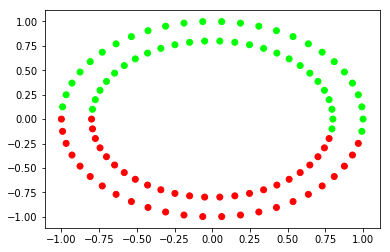

In [20]:
#Q1 c (i)
#Two Concentric Circles/"Dataset Depicted Above"
#TA On Piazza said we are allowed to use sklearn dataset
from sklearn import datasets
import matplotlib.pyplot
%matplotlib inline  
dataset = datasets.make_circles()
X_concentric_circles = dataset[0]
#Running Lloyds
lloyds_assignments = lloyds(X_concentric_circles,2)[1]
X_values = [point[0] for point in X_concentric_circles]
Y_values = [point[1] for point in X_concentric_circles]
#Mapping Lloyds Assignments to RGB Colors
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
#Plotting Results
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

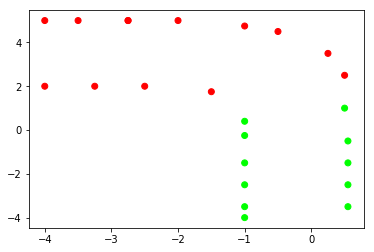

In [23]:
#Q1 c (i)
#Example Dataset #1 where optimal kmeans setting results in undesirable clustering
X_example_1 = np.array([[-4,2],[-4,5],[-3.25,2],[-2.75,5],[-1,0.4],[-2.75,5],[-1,4.75],[-0.5,4.5],[-1.5,1.75],
                        [0.25,3.5], [0.5,2.5],[0.5,1],[0.55,-0.5],[0.55,-1.5], [-1, -0.25],[-1,-1.5],[-1,-2.5],
                        [-1,-3.5],[-1,-4], [0.55,-2.5], [0.55,-3.5], [-2,5], [-2.5,2], [-3.5,5]])
#Running Lloyds
lloyds_assignments = lloyds(X_example_1, 2)[1]
X_values = [point[0] for point in X_example_1]
Y_values = [point[1] for point in X_example_1]
#Mapping Lloyds Assignments to RGB Colors
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

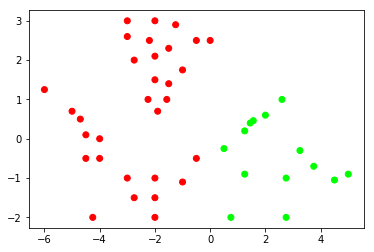

In [24]:
#Q1 c (i)
#Example Dataset #2 where optimal kmeans setting results in undesirable clustering
X_example_2 = np.array([[1.56,0.46],[1.45,0.4],[2,0.6],[-4.7,0.5],[-6,1.25],[-4,0],[-4.5,0.1],
                        [-4,-0.5], [-4.5,-0.5], [-5,0.7], [-4.25,-2], [-2.75, -1.5], [-2,-2], [-1,-1.1], 
                        [-0.5, -0.5], [0.5,-0.25],[1.25,-0.9], [0.75,-2], [2.75,-2],[2.75,-1], [-3,-1],
                       [3.25,-0.3], [3.75, -0.7], [4.5, -1.05], [5,-0.9], [1.25,0.2],[-1.25,2.9],[-3,3],
                       [-2.75,2], [-2,2.1], [-1,1.75], [0, 2.5], [-1.57,1], [-2,1.5],
                       [-2.25, 1], [-1.9, 0.7], [-2, 3], [-0.5,2.5], [-3, 2.6], [-1.5, 2.3], [-2, -1.5],
                       [-2, -1], [2.6,1], [-1.5, 1.4], [-2.2, 2.5]])
#Running Lloyds
lloyds_assignments = lloyds(X_example_2, 2)[1]
X_values = [point[0] for point in X_example_2]
Y_values = [point[1] for point in X_example_2]
#Mapping Lloyds Assignments to RGB Colors
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)